# CHEM571B Final Exam Fall 2018

1. Show that $\mathbf{C} = \begin{bmatrix} (2(1+S_{12})^{-0.5} & (2(1-S_{12})^{-0.5} \\ (2(1+S_{12})^{-0.5} & -(2(1+S_{12})^{-0.5}\end{bmatrix}$ for the H$_2$ molecule in a minimal basis.

We start by defining our two basis functions $\phi_1$ and $\phi_2$ that are used to describe the 1s atomic orbital on each of the atoms.  The molecular wavefunctions that result from the varitaionl solution in these two atomic basis functions are

$\psi_1 = c_1 \phi_1 + c_2 \phi_2$ 

$\psi_2 = c_3 \phi_1 + c_4 \phi_2$

where ${c_i}$ are our variational coefficients.  We start by normalizing each molecular wavefunction:

$\langle\psi_1|\psi_1\rangle = 1 = c_1^2 \langle \phi_1|\phi_1\rangle + c_2^2 \langle \phi_2|\phi_2\rangle + 2c_1c_2\langle\phi_1|\phi_2\rangle$

$ = c_1^2 + 2c_1c_2 S_{12} + c_2^2$

where we have used that the atomic basis functions are normalized ($\langle\phi_i|\phi_i\rangle = 1$).  The symmetry of the problem dictates that $c_1^2 = c_2^2$ and $c_3^2 = c_4^2$ (or $c_1 = \pm c_2$ and $c_3 = \pm c_4$).  Thus we can rewrite the above two equations as:

$ 1 = 2c_1^2(1 \pm S_{12})$

$\Rightarrow c_1 = \pm \sqrt{\frac{1}{2(1 \pm S_{12})}}$

We could arive at a similar result for $c_3$.  We must now utilize the required orthogonality of the two vectors:

$c_1c_3 + c_2c_4 = 0$

$\Rightarrow c_1c_3 = -c_2c_4$

$\Rightarrow c_1/c_2 = -c_4/c_3$

This requires that $c_1$ and $c_2$ be of the same sign and $c_4$ and $c_3$ be of different sign (or vice versa).  It can be shown that this type of gerade symmetry is the lower energy state but we we just use that $c_1 = c_2$ and $c_3 = -c_4$ here to get

$c_1 = c_2 = \sqrt{\frac{1}{2(1 + S_{12})}}$

Note that the same sign of the coefficients implies that both $\pm$ in sqaure root is a plus and choosing the plus or minus sign outside the square root is arbitrary.  

$c_3 = \sqrt{\frac{1}{2(1 - S_{12})}}$

$c_4 = -\sqrt{\frac{1}{2(1 + S_{12})}}$


\2. Show that the Hamiltonian matrix for the full-CI of the H$_2$ molecule in a minimal basis is given as

$\mathbf{H_{CI}} = \begin{bmatrix} 2h_{11} + J_{11} & K_{12} \\ K_{12} & 2h_{22} + J_{22}\end{bmatrix}$

where $h_{11} = \langle \psi_1|h(1)|\psi_1\rangle$, $J_{ii} = \langle \psi_i\psi_i|r_{12}^{-1}|\psi_i\psi_i \rangle$, $K_{ij} = \langle \psi_i\psi_i|r_{12}^{-1}|\psi_j\psi_j\rangle$ and $\psi_i$ is the $i$th molecular spacial orbital.

This was done in class and most of you got it right so I will not go through this in great detail.  Here are the steps:

1. Use Brillouin's theorem to state that singly excited determinants will not mix with the ground-state and thus we need only consider the g.s. and doubly excited state determinants.  

2. Compute matrix elements - diagonal elements are relatively straight-forward.  Can either write them out directly or consider the HF energy equation. Off-diagonal elements are not too hard either...

\3. Compute the dissocation curve for the Li$_{2}$ molecule in a minimal STO-3G (alpha and d values for the Li 1s and Li 2s given below) basis at the following levels of theory

    a. rHF
    
    b. Configuration Interaction in which you only consider two determinants: the ground-state and the double excited state $\sigma^2 \rightarrow \sigma^{*2}$.
    
    c. What is the minimum energy bond distance and dissociation energy in both rHF and CI?
    
    d. What is the nature of the bond? (can be done only in rHF)
    
    e. Plot the electron density as a function of position along the bond vector. (only for rHF)

In [1]:
# load some libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from scipy.special import sph_harm
from scipy.special import erf
import hf_routines as hf
import plotting as myplt

In [2]:
# setup the system
N = 6        # number of electrons
nAtoms = 2   # number of atoms
M = 4        # number of basis functions

In [3]:
# set STO-3G basis 
d1s = [0.15432897,0.53532814,0.44463454]
d2s = [-0.09996723,0.39951283,0.70011547]
alpha1s = [16.1195750,2.9362007,0.7946505]
alpha2s = [0.6362897,0.1478601,0.0480887]
R = np.empty((nAtoms,3),dtype=float)
R[0,0] = R[0,1] = R[0,2] = 0.0
R[1,0] = 1.5
R[1,1] = R[1,2] = 0.0
R_basis = np.stack((R[0,:],R[0,:],R[1,:],R[1,:]))
alpha_basis = np.stack((alpha1s,alpha2s,alpha1s,alpha2s))
d_basis = np.stack((d1s,d2s,d1s,d2s))
Z = [3.0,3.0]
basis_set = [hf.sto(3,alpha_basis[i],d_basis[i],R_basis[i,:]) for i in range(M)]
atoms = [hf.atom(R[i,:],Z[i]) for i in range(nAtoms)]

In [4]:
# This routine worked directly from code provided in class
S, Sinv = hf.overlap(basis_set)
print(S)

[[1.         0.24113665 0.18502059 0.2334712 ]
 [0.24113665 1.         0.2334712  0.92757185]
 [0.18502059 0.2334712  1.         0.24113665]
 [0.2334712  0.92757185 0.24113665 1.        ]]


In [5]:
# this routine needed to be updated but this was provided with the exam
X = hf.orthogonalize_basis(S)
print X

[[ 0.21083317  0.65087864  0.78319061  0.02713379]
 [ 0.43261039 -0.31720645  0.00808411 -2.62872712]
 [ 0.21083317  0.65087864 -0.78319061 -0.02713379]
 [ 0.43261039 -0.31720645 -0.00808411  2.62872712]]


In [6]:
# These routines also remained unchanged from class
T = hf.kinetic(basis_set)
V = hf.core_potential(basis_set,atoms)
Hcore = V + T
twoE = hf.compute_twoE(basis_set)
print Hcore

[[-6.40310428 -1.44897037 -1.46209339 -1.41989902]
 [-1.44897037 -2.22862415 -1.41989902 -2.12065697]
 [-1.46209339 -1.41989902 -6.40310428 -1.44897037]
 [-1.41989902 -2.12065697 -1.44897037 -2.22862415]]


In [8]:
# The density matrix actually depends on the number of electrons 
# - so this code neded to be updated
# code was provided with exam too
P = hf.constructDensityMat(C,N)
print(P)

[[ 2.04228169 -0.21053155  0.07583033 -0.27621441]
 [-0.21053155  1.00405018 -0.27621441  1.00185626]
 [ 0.07583033 -0.27621441  2.04228169 -0.21053155]
 [-0.27621441  1.00185626 -0.21053155  1.00405018]]


In [7]:
# now compute energy as a function of r
r = np.arange(0.5,10,0.01)
hf_energy = np.empty(r.size)
C = np.empty((M,M))
for j in range(r.size):
    R[1,0] = r[j]
    R_basis = np.stack((R[0,:],R[0,:],R[1,:],R[1,:]))
    basis_set = [hf.sto(3,alpha_basis[i],d_basis[i],R_basis[i,:]) for i in range(M)]
    atoms = [hf.atom(R[i,:],Z[i]) for i in range(nAtoms)]
    hf_energy[j], C, Hcore, F = hf.perform_hf_scf(basis_set,atoms,N)

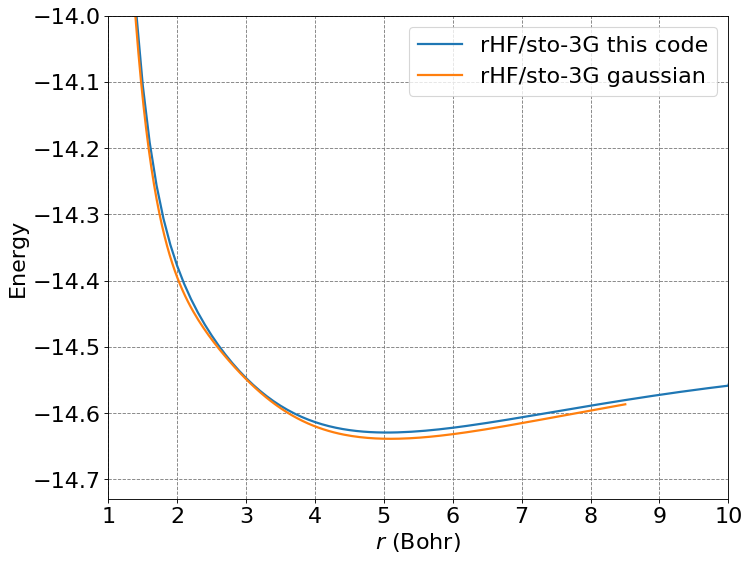

In [11]:
# plot Energy as a function of r
gauss_rhf = np.loadtxt("li2_rhf.txt",skiprows=1)
ax = myplt.define_figure(xlabel="$r$ (Bohr)",ylabel="Energy")
ax.set_xlim(1,10)
ax.set_ylim(np.amin(hf_energy)-0.1, -14)
ax.plot(r,hf_energy,lw=2,label="rHF/sto-3G this code")
ax.plot(gauss_rhf[:,0]*1.889725989,gauss_rhf[:,1],lw=2,label="rHF/sto-3G gaussian")
ax.legend(fontsize=20)

In [10]:
print("Minimum Energy Distance:", r[np.argmin(hf_energy)])
print("Minimum Energy:", np.amin(hf_energy))

('Minimum Energy Distance:', 5.0400000000000045)
('Minimum Energy:', -14.629296981835534)


In [12]:
# rerun HF at minimum distance so that we can plot electron density at this distance
R[1,0] = 5.04
C = np.empty((M,M))
R_basis = np.stack((R[0,:],R[0,:],R[1,:],R[1,:]))
basis_set = [hf.sto(3,alpha_basis[i],d_basis[i],R_basis[i,:]) for i in range(M)]
atoms = [hf.atom(R[i,:],Z[i]) for i in range(nAtoms)]
hfE, C, Hcore, F = hf.perform_hf_scf(basis_set,atoms,N)

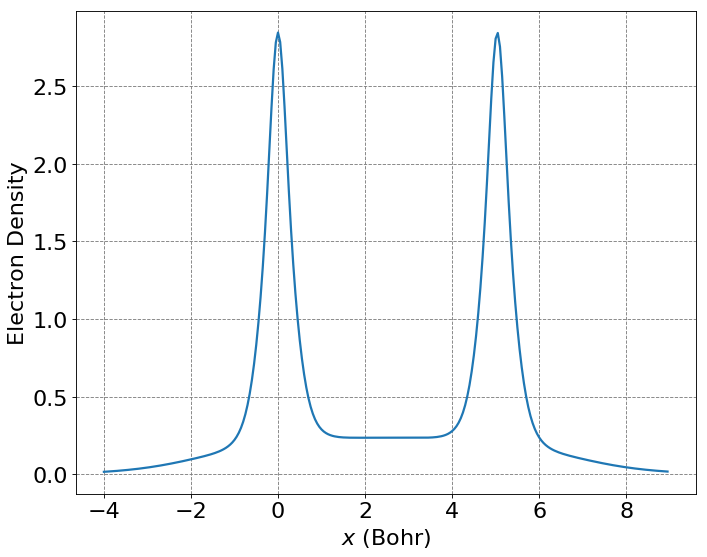

In [14]:
# plot electron density
x = np.arange(-4,9,0.05)
P = hf.constructDensityMat(C,N)
density1 = hf.compute_electron_density(basis_set,P,x)
#density2 = hf.compute_electron_density(basis_set,P_z_1_2,x)
ax = myplt.define_figure(xlabel="$x$ (Bohr)",ylabel="Electron Density")
ax.plot(x,density1,lw=2)
#ax.plot(x,density2,lw=2,label="Z=2")
ax.legend(fontsize=20)

The minimum energy bond distance is 5.04 Angstroms.  Note that the electron density is not peaked in the middle the way you might expect from the H$_2$ like systems.  This is an extremely weak bond.  The electrons are very weakly localized to the bonding orbital between the two nuclei.

## CI

For CI we need to derive the CI matrix.  This is given as

$\mathbf{H} = \begin{bmatrix} \langle\psi_0|H|\psi_0\rangle & \langle\psi_0|H|\psi_{22} \rangle \\ \langle\psi_0|H|\psi_{22}\rangle & \langle\psi_{22}|H|\psi_{22}\rangle\end{bmatrix}$

where I have used that the Hamiltonian matrix is Hermitian.  Now let's consider each matrix element.

$ \langle\psi_0|H|\psi_0\rangle $ is simply the ground-state HF energy.  We will just use that energy.

$ \langle\psi_0|H|\psi_{22}\rangle = K_{34}$ so we will need the two-electron integrals in the molecular orbitals.

$ \langle\psi_{22}|H|\psi_{22}\rangle $ is the energy of the doubly excited determinant.  Rather than working through all of the equations I will just make the density matrix dictate that we have two electrons in orbital four and compute the energy using the density matrix energy equation.

In [4]:
# create and populate density matrix
def constructDensityMatDoublyExcited(C,N):
    M = C.shape[0]
    P = np.zeros((M,M),dtype=float)
    occupied_orbitals = [0,1,3] # rather than 0, 1 and 2 in this case
    for i in range(M):
        for j in range(i,M):
            for a in occupied_orbitals:
                P[i,j] += C[i,a]*C[j,a]
            P[i,j] *= 2.0
            P[j,i] = P[i,j]
    return P

In [5]:
# compute total energy for HF using the density matrix formulation
def electronic_energy(F,Hcore,P):
    Etotal = 0.0
    for i in range(M):
        for j in range(M):
            Etotal += P[i,j]*(Hcore[i,j]+F[i,j])
    Etotal*=0.5
    return Etotal

In [6]:
# CI routine for Li2 - will populate hamiltonian matrix, diagonlize matrix and return energies and CI coefficients
def li2_ci(C,F,Hcore,twoE,atoms):
    
    P_gs = hf.constructDensityMat(C,N)
    P_es = constructDensityMatDoublyExcited(C,N)
    
    HCI = np.empty((2,2))
    HCI[0,0] = electronic_energy(F,Hcore,P_gs)
    HCI[1,1] = electronic_energy(F,Hcore,P_es)
    HCI[0,1] = HCI[1,0] = twoE[2,3,3,2]
    e,v = np.linalg.eig(HCI)
    idx = e.argsort()
    e = e[idx]
    v = v[:,idx]
    # nuclear energy
    Enucl = 0.0
    nAtoms = len(atoms)
    for atom1 in range(nAtoms-1):
        for atom2 in range(atom1+1,nAtoms):
            diff = atoms[atom1].pos - atoms[atom2].pos
            dist = np.linalg.norm(diff)
            Enucl += atoms[atom1].charge*atoms[atom2].charge/dist
    e += Enucl
    return e, v


In [9]:
r = np.arange(1.0,15,0.1)
hf_energy = np.empty(r.size)
ci_energy = np.empty(r.size)
C = np.empty((M,M))
for j in range(r.size):
    R[1,0] = r[j]
    R_basis = np.stack((R[0,:],R[0,:],R[1,:],R[1,:]))
    basis_set = [hf.sto(3,alpha_basis[i],d_basis[i],R_basis[i,:]) for i in range(M)]
    atoms = [hf.atom(R[i,:],Z[i]) for i in range(nAtoms)]
    hf_energy[j], C, Hcore, F, hf_twoE = hf.perform_hf_scf(basis_set,atoms,N)
    ci_energies, ci_vecs = li2_ci(C,F,Hcore,hf_twoE,atoms)
    ci_energy[j] = ci_energies[0]

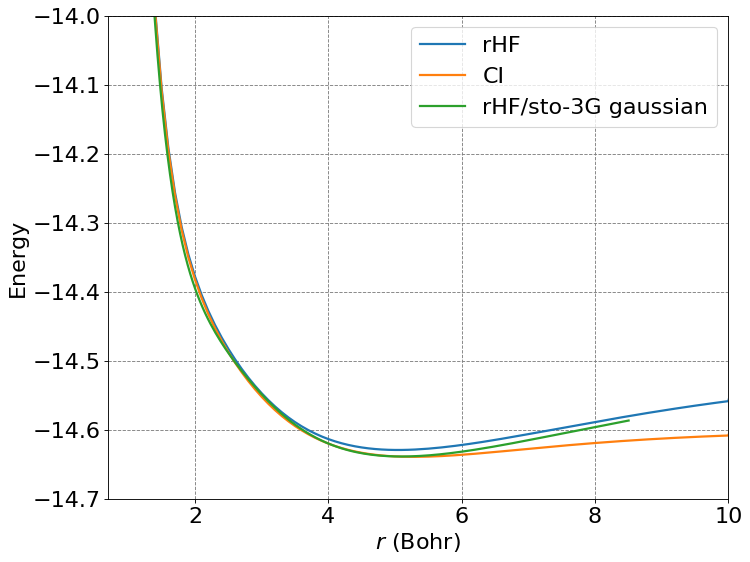

In [14]:
ax = myplt.define_figure(xlabel="$r$ (Bohr)",ylabel="Energy")
#ax.set_ylim(-15,10)
ax.plot(r,hf_energy,lw=2,label="rHF")
ax.plot(r,ci_energy,lw=2,label="CI")
ax.plot(gauss_rhf[:,0]*1.889725989,gauss_rhf[:,1],lw=2,label="rHF/sto-3G gaussian")
ax.set_xlim(0.7,10)
ax.set_ylim(-14.7,-14)
ax.legend(fontsize=20)

We can see that the CI reduces the energy at the minimum as well as changes the behavior at infinite separation - as we would expect.